In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [5]:
# FIXED DATASET LOADER - Using correct path
import os
import shutil
import random
import numpy as np
from PIL import Image

def load_sample_dataset(dataset_path, sample_size=500):
    """
    Simple function to create sample dataset and load it
    
    Args:
        dataset_path: Path to your unzipped dataset folder
        sample_size: Number of images per class
    """
    
    print(f"📂 Loading dataset from: {dataset_path}")
    
    # Create sample directory
    sample_dir = "sample_dataset"
    os.makedirs(f"{sample_dir}/Parasitized", exist_ok=True)
    os.makedirs(f"{sample_dir}/Uninfected", exist_ok=True)
    
    # Find source folders - FIXED PATH
    parasitized_path = os.path.join(dataset_path, "Parasitized")
    uninfected_path = os.path.join(dataset_path, "Uninfected")
    
    # Check if paths exist
    if not os.path.exists(parasitized_path):
        print(f"❌ Path not found: {parasitized_path}")
        return None
    if not os.path.exists(uninfected_path):
        print(f"❌ Path not found: {uninfected_path}")
        return None
    
    # Get image files
    parasitized_files = [f for f in os.listdir(parasitized_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    uninfected_files = [f for f in os.listdir(uninfected_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"📊 Found {len(parasitized_files)} parasitized images")
    print(f"📊 Found {len(uninfected_files)} uninfected images")
    
    # Sample files
    parasitized_sample = random.sample(parasitized_files, min(sample_size, len(parasitized_files)))
    uninfected_sample = random.sample(uninfected_files, min(sample_size, len(uninfected_files)))
    
    # Copy sampled files
    print("📋 Creating sample dataset...")
    
    for file in parasitized_sample:
        src = os.path.join(parasitized_path, file)
        dst = os.path.join(sample_dir, "Parasitized", file)
        shutil.copy2(src, dst)
    
    for file in uninfected_sample:
        src = os.path.join(uninfected_path, file)
        dst = os.path.join(sample_dir, "Uninfected", file)
        shutil.copy2(src, dst)
    
    print(f"✅ Sample created: {len(parasitized_sample)} + {len(uninfected_sample)} images")
    print(f"🚀 Sample dataset ready at: {sample_dir}")
    
    return sample_dir

# CORRECTED: Use the full path to cell_images folder
dataset_path = r"C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images"

# Alternative: If you're running from SafeCell directory, you can use relative path
# dataset_path = "archive (1)/cell_images"

sample_path = load_sample_dataset(dataset_path)

if sample_path:
    print(f"\n📁 Your sample dataset is ready at: {sample_path}")
else:
    print("\n❌ Failed to create sample dataset. Please check the path.")
    print(f"Expected folders: {dataset_path}/Parasitized and {dataset_path}/Uninfected")

📂 Loading dataset from: C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images
📊 Found 13779 parasitized images
📊 Found 13779 uninfected images
📋 Creating sample dataset...
✅ Sample created: 500 + 500 images
🚀 Sample dataset ready at: sample_dataset

📁 Your sample dataset is ready at: sample_dataset


In [6]:

import numpy as np
import tensorflow as tf

def plot_class_distribution_pie(sample_dir):
    class_folders = [d for d in os.listdir(sample_dir) if os.path.isdir(os.path.join(sample_dir, d))]
    counts = [len(os.listdir(os.path.join(sample_dir, c))) for c in class_folders]
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=class_folders, autopct='%1.1f%%', colors=['#ff9999','#99ff99'])
    plt.title("Class Distribution in Sample Dataset")
    plt.show()

def visualize_sample_images_with_predictions(dataset, model=None, class_names=None, samples_per_class=5):
    plt.figure(figsize=(15, 6))
    displayed = {name: 0 for name in class_names}
    total_displayed = 0
    max_total = samples_per_class * len(class_names)

    for images, labels in dataset.unbatch():
        label = labels.numpy()
        class_name = class_names[label]

        if displayed[class_name] < samples_per_class:
            plt.subplot(len(class_names), samples_per_class, total_displayed + 1)

            img = images.numpy().astype("uint8")
            plt.imshow(img)

            title = class_name
            if model:
                # Predict class if model is provided
                pred_probs = model.predict(tf.expand_dims(images, axis=0))
                pred_label = class_names[np.argmax(pred_probs)]
                title += f"\nTrue: {class_name}\nPred: {pred_label}"

            plt.title(title)
            plt.axis("off")
            displayed[class_name] += 1
            total_displayed += 1

        if total_displayed >= max_total:
            break

    plt.suptitle("Sample Images with True and Predicted Labels" if model else "Sample Images from Each Class")
    plt.show()

# Usage (after loading sample_path and datasets):

plot_class_distribution_pie(sample_path)

# Load training dataset again if needed:
train_ds = keras.utils.image_dataset_from_directory(
    sample_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

class_names = ['Parasitized', 'Uninfected']
visualize_sample_images_with_predictions(train_ds, class_names=class_names)


NameError: name 'sample_path' is not defined

In [1]:
import sys
print(sys.executable)


c:\Users\KevinNyiringango\anaconda3\envs\celldetect\python.exe


In [10]:
# =========================
# 📦 Import Dependencies
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# =========================
# 🤖 Import Keras Modules
# =========================
from keras import models, layers

# =========================
# 🧠 CNN Model Function
# =========================
def create_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# =========================
# 🧾 Create and Summarize Model
# =========================
model = create_cnn_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 2907 files belonging to 2 classes.
Using 2326 files for training.
Found 2907 files belonging to 2 classes.
Using 581 files for validation.
Classes: ['Parasitized', 'Uninfected']
Creating simple model for testing...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training simple model...
Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.5040 - loss: 0.8233 - val_accuracy: 0.6024 - val_loss: 0.6770
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.6401 - loss: 0.6510 - val_accuracy: 0.6627 - val_loss: 0.6532
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.6992 - loss: 0.6229 - val_accuracy: 0.7676 - val_loss: 0.5276
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - accuracy: 0.8320 - loss: 0.4594 - val_accuracy: 0.9002 - val_loss: 0.4064
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - accuracy: 0.8880 - loss: 0.3639 - val_accuracy: 0.9071 - val_loss: 0.3559
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.8924 - loss: 0.3175 - val_accuracy: 0.9088 - val_loss: 0.3381
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.9294 - loss: 0.2332 - val_accuracy: 0.9346 - val_loss: 0.2743
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.9406 

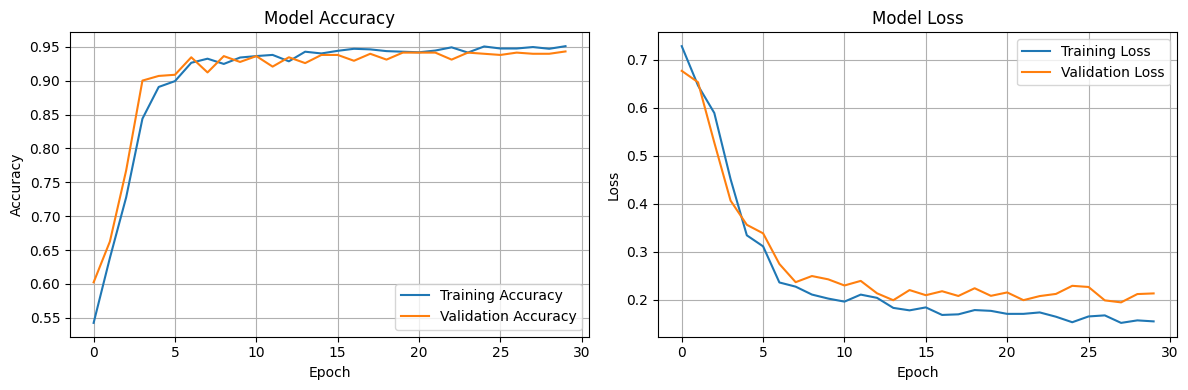


Training Set Distribution:

Class Distribution:
  Parasitized: 1174 samples (50.5%)
  Uninfected: 1152 samples (49.5%)

Validation Set Distribution:

Class Distribution:
  Parasitized: 285 samples (49.1%)
  Uninfected: 296 samples (50.9%)


In [5]:
# Simplified model to diagnose the issue
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.callbacks import EarlyStopping

# Use the same data loading as before
dataset_path = "sample_dataset"
image_size = (128, 128)  # Smaller images for faster training
batch_size = 32

# Load data
train_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='int'
)

val_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='int'
)

class_names = train_dataset.class_names
print(f"Classes: {class_names}")

# Preprocess data
def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# MUCH SIMPLER MODEL for testing
def create_simple_model(input_shape=(128, 128, 3), num_classes=2):
    model = models.Sequential([
        # Simple augmentation
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        
        # First conv block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.2),
        
        # Second conv block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.2),
        
        # Third conv block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.2),
        
        # Classifier
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Simple optimizer - no fancy scheduling
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train simple model
print("Creating simple model for testing...")
simple_model = create_simple_model()
simple_model.summary()

# Simple callback
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,  # Reduced patience
    restore_best_weights=True,
    verbose=1
)

# Train for fewer epochs first
print("Training simple model...")
history = simple_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,  # Fewer epochs
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
val_loss, val_acc = simple_model.evaluate(val_dataset, verbose=0)
print(f"\nSimple Model Results:")
print(f"Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
print(f"Validation Loss: {val_loss:.4f}")

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Check class distribution
def check_class_distribution(dataset, class_names):
    class_counts = {name: 0 for name in class_names}
    total_samples = 0
    
    for images, labels in dataset:
        for label in labels:
            class_counts[class_names[label.numpy()]] += 1
            total_samples += 1
    
    print(f"\nClass Distribution:")
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}%)")
    
    return class_counts

print("\nTraining Set Distribution:")
train_dist = check_class_distribution(train_dataset, class_names)

print("\nValidation Set Distribution:")
val_dist = check_class_distribution(val_dataset, class_names)